In [558]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10, 6)

In [535]:
import pandas as pd
import matplotlib.pyplot as plt

In [560]:
zipcodes = pd.read_csv('./both_all_us_race.csv')
complaints = pd.read_csv('./Consumer_Complaints.csv')

In [575]:
complaints["zipcode"] = complaints["ZIP code"].astype(str)
zipcodes["zipcode"] = zipcodes.zipcode.astype(str)
merged = pd.merge(complaints, zipcodes, on='zipcode', how='inner')

In [576]:
# ally = merged[merged.Company == 'Ally Financial Inc.']
# ally = ally[ally['Product'] == 'Consumer Loan']
# merged = ally

# honda = merged[merged.Company == 'American Honda Finance Corporation']
# merged = honda

# ocwen = merged[merged.Company == 'Ocwen']
# merged = ocwen

# toyota = merged[merged.Company == 'Toyota Motor Credit Corporation']
# merged = toyota

# good one
# gm = merged[merged.Company == 'GM Financial']
# merged = gm

# good one
# ford = merged[merged.Company == 'Ford Motor Credit Company']
# merged = ford

wells = merged[merged.Company == 'Wells Fargo & Company']
merged = wells

# ezcorp = merged[merged.Company == 'EZCORP, Inc.']
# merged = ezcorp

# delbert = merged[merged.Company == 'Delbert Services']
# merged = delbert

# amex = merged[merged.Company == 'Amex']
# merged = amex

# entire category
# prod_mort = merged[merged.Product == 'Mortgage']
# merged = prod_mort

# entire category
# veh_loan = merged[merged.Subproduct == 'Vehicle loan']
# merged = veh_loan

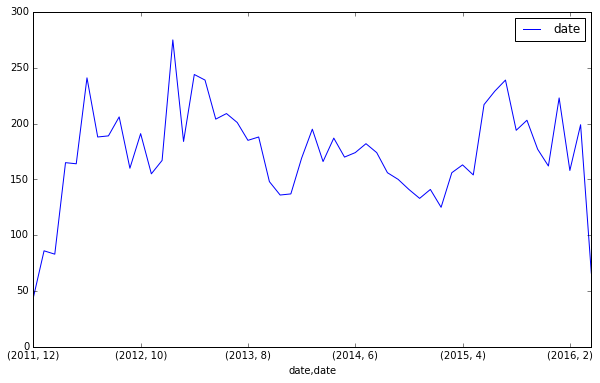

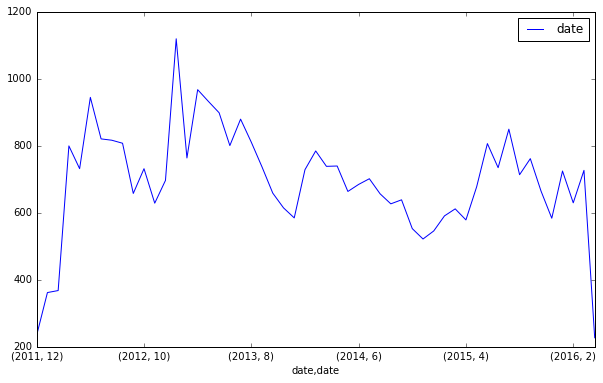

In [577]:
black_top_quartile = merged.percentage_black.quantile(q=0.75)
dates_black = merged[merged.percentage_black > black_top_quartile]['Date received'].to_frame()
dates_black.columns = ['date']
dates_black = pd.to_datetime(dates_black['date']).to_frame()
dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month]).count().plot()

dates = merged['Date received'].to_frame()
dates.columns = ['date']
dates = pd.to_datetime(dates['date']).to_frame()
dates.groupby([dates.date.dt.year, dates.date.dt.month]).count().plot()

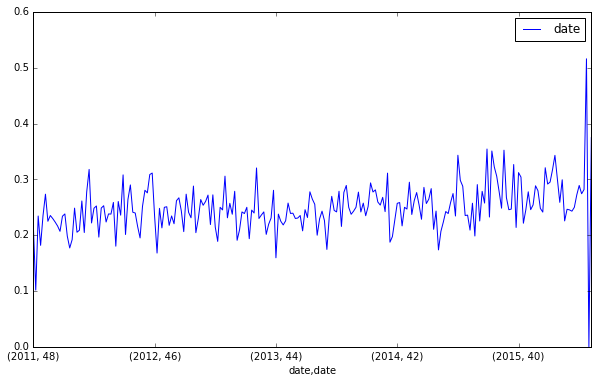

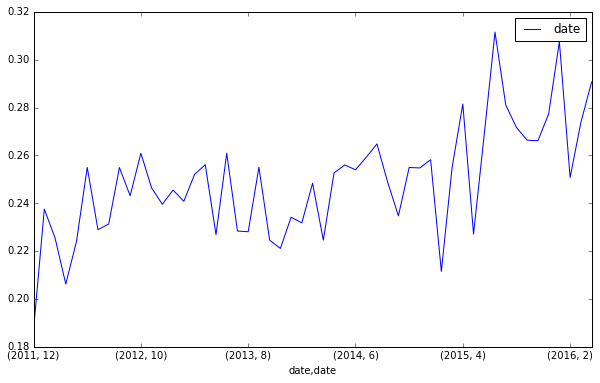

In [578]:
black_all_count_ratio = black.divide(all, fill_value=0)

black_week = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.week]).count()
all_week = dates.groupby([dates.date.dt.year, dates.date.dt.week]).count()
black_all_week_count_ratio = black_week.divide(all_week, fill_value=0)
black_all_week_count_ratio.plot()

black_month = dates_black.groupby([dates_black.date.dt.year, dates_black.date.dt.month]).count()
all_month = dates.groupby([dates.date.dt.year, dates.date.dt.month]).count()
black_all_month_count_ratio = black_month.divide(all_month, fill_value=0)
black_all_month_count_ratio.plot()